We use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-10-18 16:15:25--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 143.204.178.108, 143.204.178.3, 143.204.178.41, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|143.204.178.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2869375 (2.7M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>]   2.74M  10.9MB/s    in 0.3s    

2020-10-18 16:15:25 (10.9 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [2869375/2869375]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable default interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-10-18   18     10  2020     68       3             Afghanistan    AF   
1 2020-10-17   17     10  2020     47       4             Afghanistan    AF   
2 2020-10-16   16     10  2020      0       0             Afghanistan    AF   
3 2020-10-15   15     10  2020     32       1             Afghanistan    AF   
4 2020-10-14   14     10  2020     66       0             Afghanistan    AF   
5 2020-10-13   13     10  2020    129       3             Afghanistan    AF   
6 2020-10-12   12     10  2020     96       4             Afghanistan    AF   
7 2020-10-11   11     10  2020      0       0             Afghanistan    AF   
8 2020-10-10   10     10  2020     10       1             Afghanistan    AF   
9 2020-10-09    9     10  2020     77       2             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           2.218615           
1                                           2.058265           
2                                           1.947860           
3                                           1.992547           
4                                           1.945231           
5                                           1.811168           
6                                           1.503611           
7                                           1.251257           
8                                           1.343261           
9                                           1.332746

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       49782
day                                                           49782
month                                                         49782
year                                                          49782
cases                                                         49782
deaths                                                        49782
countriesAndTerritories                                       49782
geoId                                                         49782
countryterritoryCode                                          49718
popData2019                                                   49718
continentExp                                                  49782
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    46998
dtype: int64

We pivot to a country by column format.

In [5]:
# File parameters prefixed pf_

pf_datcol = 'dateRep'                     # date column
pf_dimcol = 'geoId'                       # dimension column (location or otherwise)
pf_cascol = ['cases', 'deaths']           # case columns (new, not cumulative)
pf_namcol = 'countriesAndTerritories'     # full dim name
pf_popcol = 'popData2019'                 # population column

pf_futext = '365 days'                    # future extension of dataframe

In [6]:
df_dim = df.pivot_table(index=pf_datcol, columns=pf_dimcol, values=pf_cascol, aggfunc='sum').fillna(0)
df_dim

cases                                                         \
geoId          AD      AE    AF   AG   AI     AL      AM     AO       AR   
dateRep                                                                    
2019-12-31    0.0     0.0   0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-01    0.0     0.0   0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-02    0.0     0.0   0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-03    0.0     0.0   0.0  0.0  0.0    0.0     0.0    0.0      0.0   
2020-01-04    0.0     0.0   0.0  0.0  0.0    0.0     0.0    0.0      0.0   
...           ...     ...   ...  ...  ...    ...     ...    ...      ...   
2020-10-14    0.0  1315.0  66.0  0.0  0.0  182.0  1058.0  122.0  13305.0   
2020-10-15  195.0  1431.0  32.0  1.0  0.0  203.0     0.0  192.0  14932.0   
2020-10-16    0.0  1398.0   0.0  0.0  0.0  257.0  1371.0  166.0  17096.0   
2020-10-17  187.0  1412.0  47.0  0.0  0.0  289.0  1465.0  250.0  16546.0   
2020-10-18    0.0  1538.0  68.0  7.0  0.0  273.0  1540.0  126.0  13510.0   

                    ... deaths                                                 
geoId           AT  ...     VC   VE   VG   VI   VN   XK   YE     ZA   ZM   ZW  
dateRep             ...                                                        
2019-12-31     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-01     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-02     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-03     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
2020-01-04     0.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  
...            ...  ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  ...  
2020-10-14  1171.0  ...    0.0  6.0  0.0  0.0  0.0  1.0  1.0  248.0  0.0  0.0  
2020-10-15  1606.0  ...    0.0  4.0  0.0  0.0  0.0  1.0  0.0  123.0  0.0  1.0  
2020-10-16  1396.0  ...    0.0  6.0  0.0  1.0  0.0  1.0  0.0  158.0  1.0  0.0  
2020-10-17  1691.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   61.0  0.0  0.0  
2020-10-18  2040.0  ...    0.0  5.0  0.0  0.0  0.0  2.0  0.0   38.0  0.0  0.0  

[293 rows x 422 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_dim.index.min(), df_dim.index.max() + pd.Timedelta(pf_futext))
df_dim = df_dim.reindex(new_index)
df_dim

cases                                               ... deaths  \
geoId         AD   AE   AF   AG   AI   AL   AM   AO   AR   AT  ...     VC   
2019-12-31   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-01   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-02   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-03   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2020-01-04   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
2021-10-14   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-15   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-16   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-17   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
2021-10-18   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   

                                                         
geoId        VE   VG   VI   VN   XK   YE   ZA   ZM   ZW  
2019-12-31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  
2021-10-14  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-16  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-17  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-10-18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[658 rows x 422 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_dim['daynum'] = (df_dim.index - df_dim.index.min()).days
df_dim['daynum'].describe()

count    658.000000
mean     328.500000
std      190.092521
min        0.000000
25%      164.250000
50%      328.500000
75%      492.750000
max      657.000000
Name: daynum, dtype: float64

The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [100]:
# Run parameters prefixed pr_

pr_dim      = 'AT'                        # dimension indicator (geo or otherwise)

pr_measure  = 'cases'                     # file column to use as measure
pr_smeasure = 'Week window'               # smoothed measures
pr_rmeasure = 'rcases'                    # remaining measures after iteration
pr_pmeasure = 'Model'                     # projected measures summed
pr_wmeasure = 'Wave '                     # wave name prefix, zero-leading number is added
pr_wavenum  = 2                           # wave numbering width

pr_sdays    = 7                           # number of days for smoothing window
pr_firstwav = 1                           # initial wave number
pr_popcases = 1e6                         # relative minimum from population size (one in n cases)
pr_mincases = 2                           # absolute minimum number of cases to consider

pr_linmax   = -1/2                        # upper bound of linear derivation
pr_linmin   = -9/2                        # lower bound of linear derivation
pr_betamax  = 33                          # maximum accepted beta estimate
pr_datamin  = 3                           # minimum number of data points in spline
pr_projmin  = 1                           # minimum cases for projected start and floor
pr_gradmin  = 1e-6                        # minimum gradient difference for knot

pr_plotmin  = '20200101'                  # start date of output plots
pr_plotmax  = '20210101'                  # stop date of output plots

pr_earth = {'minspan'     : 1,
            'penalty'     : 0,
            'endspan'     : 0,
            'thresh'      : 1e-9,
            'check_every' : 1} 

In [101]:
wave = pr_firstwav

# Initialize predicted measure, create smoothed measure and remaining cases
df_dim[(pr_pmeasure, pr_dim)] = 0
df_dim[(pr_smeasure, pr_dim)] = df_dim[pr_measure][pr_dim].loc[:].rolling(pr_sdays).mean()
df_dim[(pr_rmeasure, pr_dim)] = df_dim[pr_smeasure][pr_dim]

# Always plot smoothed and predicted measures, adding waves when found
plotlist = [(pr_smeasure, pr_dim), (pr_pmeasure, pr_dim)]

In [102]:
# Get full name and population from the original dataset
dimnam = df[df[pf_dimcol] == pr_dim][pf_namcol].iloc[0]
dimpop = df[df[pf_dimcol] == pr_dim][pf_popcol].iloc[0]

# We use 1 in a million cases, but at least 2
mincases = max(dimpop / pr_popcases, pr_mincases)

In [103]:
print('Running multiple wave analysis for {} with population {:1.0f}'.format(dimnam, dimpop))
print('Minimum number of cases is {:1.0f}'.format(mincases))

while True:
    # Create potential wave
    curwave = pr_wmeasure + str((wave) + (10 ** pr_wavenum))[-pr_wavenum:]
    df_dim[(curwave, pr_dim)] = 0

    # Create a dataframe for projections
    df_proj = pd.DataFrame({'daynum':df_dim['daynum'],
                            'measure':df_dim[pr_rmeasure][pr_dim]})

    # Create the Gumbel division and select suitable measures
    df_proj['gumdiv'] = df_proj['measure'] / df_proj['measure'].cumsum()
    df_proj = df_proj[(df_proj['gumdiv'] > 0) & (df_proj['measure'] > mincases)]

    # Reduce to log scale and select relevant measures
    df_proj['linear'] = np.log(df_proj['gumdiv'])
    df_proj = df_proj[(df_proj['linear'] < pr_linmax) &
                      (df_proj['linear'] > pr_linmin)]

    # Do we still have data left?
    if len(df_proj) <= 1:
        print('--- no data left')
        break
    
    # Create input vectors for regression splines and build a model
    eax = df_proj['daynum'].values.reshape(-1, 1)
    eay = df_proj['linear'].values.reshape(-1, 1)
    #eamodel = Earth()
    #eamodel = Earth(minspan=0)
    eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
    eamodel.fit(eax, eay)

    # Store the results
    df_proj['earth'] = eamodel.predict(eax)

    # Find the day range
    daymin = df_proj['daynum'].min()
    daymax = df_proj['daynum'].max()

    # Find the gradient of generated regression splines
    #df_proj['gbgrad'] = np.gradient(df_proj['linear'])
    #df_proj['eagrad'] = np.gradient(df_proj['earth'])
    df_proj['gbgrad'] = df_proj['linear'] - df_proj['linear'].shift(1)
    df_proj['eagrad'] = df_proj['earth'] - df_proj['earth'].shift(1)
    
    # Knots are found when the gradient changes, including start and end
    df_proj['knot'] = ((abs(df_proj['eagrad'] - df_proj['eagrad'].shift(1)) > pr_gradmin) |
                       (df_proj['daynum'] == (daymin + 1)) |
                       (df_proj['daynum'] == daymax))

    # Starting day of each spline
    df_proj['daycount'] = df_proj.reset_index().index

    # Select the knots and find the actual number of days for each spline
    df_knot = df_proj[df_proj['knot']][['daynum', 'daycount', 'eagrad']]
    df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
    df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

    # Candidate knots have a negative gradient and a minimum number of days
    df_knot['cand'] = ((df_knot['eagrad'] < -(1 / pr_betamax)) &
                       (df_knot['daysdata'] >= pr_datamin))

    # We want early knots with a low gradient and many days
    df_knot['since'] = df_knot['daynum'] - daymin
    df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
    df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

    # Did we find another wave?
    choice = df_knot[df_knot['choice']]
    if len(choice) == 0:
        print('--- no data for wave')
        break
    
    # Find the interval of the selected spline
    lower = choice['daynum'].values[0]
    upper = choice['daysdata'].values[0] + lower
    df_proj = df_proj[(df_proj['daynum'] >= lower) &
                      (df_proj['daynum'] <= upper)].copy()

    # Calculate slope and intercept as basis for beta and mu
    fitmod = export.export_python_function(eamodel)
    slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
    intercept = fitmod([[lower]])[0] - (lower * slope)
    beta = - 1 / slope
    mu = beta * (intercept + np.log(beta))

    # Apply the Gumbel PDF according to beta and mu and find the scale
    df_proj['pgumb'] = gumpdf(df_proj['daynum'], beta, mu)
    df_proj['scale'] = df_proj['measure'] / df_proj['pgumb']
    final = df_proj['scale'].mean()
    fincv = df_proj['scale'].std() / final

    # Calculate the current wave and its parameters
    df_dim[(curwave, pr_dim)] = final * gumpdf(df_dim['daynum'], beta, mu)
    peak = df_dim[df_dim[(curwave, pr_dim)] == df_dim[(curwave, pr_dim)].max()].index.min()
    start = df_dim[(df_dim[(curwave, pr_dim)] >= pr_projmin) &
                   (df_dim[(curwave, pr_dim)].index < peak)].index.min()
    floor = df_dim[(df_dim[(curwave, pr_dim)] < pr_projmin) &
                   (df_dim[(curwave, pr_dim)].index > peak)].index.min()
    print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
        curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))

    # Move the data from remainder to prediction
    df_dim[(pr_pmeasure, pr_dim)] += df_dim[(curwave, pr_dim)]
    df_dim[(pr_rmeasure, pr_dim)] -= df_dim[(curwave, pr_dim)]
    plotlist += [(curwave, pr_dim)]
    wave += 1

Running multiple wave analysis for Austria with population 8858775
Minimum number of cases is 9
Wave 01 beta  8.708 mu  89 fit 0.807 peak 2020-03-29 from 2020-03-10 to 2020-06-03 size 15578
Wave 02 beta 10.327 mu  79 fit 0.765 peak 2020-03-19 from 2020-03-01 to 2020-05-03 size 770
Wave 03 beta  3.933 mu 150 fit 0.847 peak 2020-05-29 from 2020-05-22 to 2020-06-16 size 351
Wave 04 beta  5.844 mu 163 fit 0.869 peak 2020-06-11 from 2020-06-01 to 2020-07-07 size 444
Wave 05 beta  8.113 mu 181 fit 0.841 peak 2020-06-29 from 2020-06-15 to 2020-08-07 size 878
Wave 06 beta  6.743 mu 192 fit 0.891 peak 2020-07-10 from 2020-06-27 to 2020-08-15 size 1342
Wave 07 beta  9.334 mu 211 fit 0.843 peak 2020-07-29 from 2020-07-10 to 2020-09-21 size 2924
Wave 08 beta 10.495 mu 239 fit 0.908 peak 2020-08-26 from 2020-08-04 to 2020-11-03 size 7445
Wave 09 beta  6.026 mu 253 fit 0.815 peak 2020-09-09 from 2020-08-28 to 2020-10-14 size 2161
Wave 10 beta  6.089 mu 262 fit 0.918 peak 2020-09-18 from 2020-09-04 t

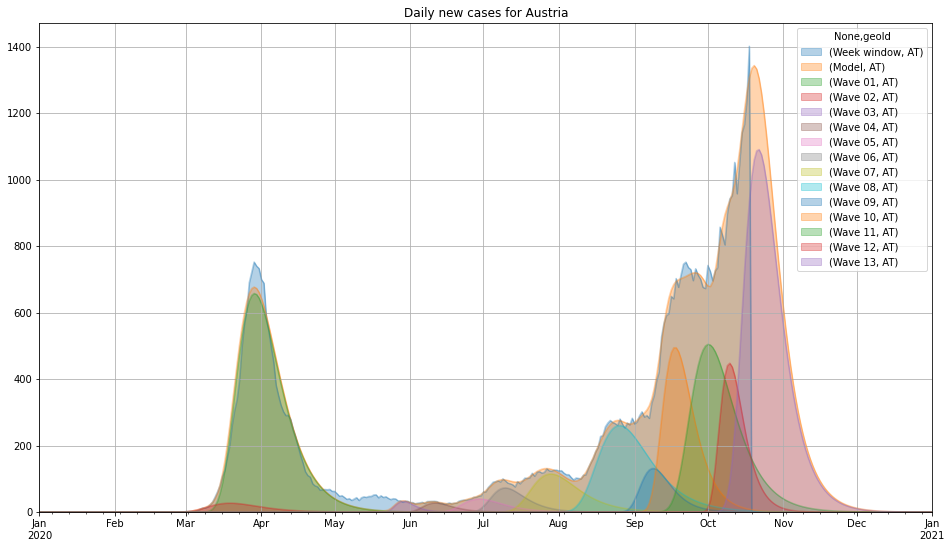

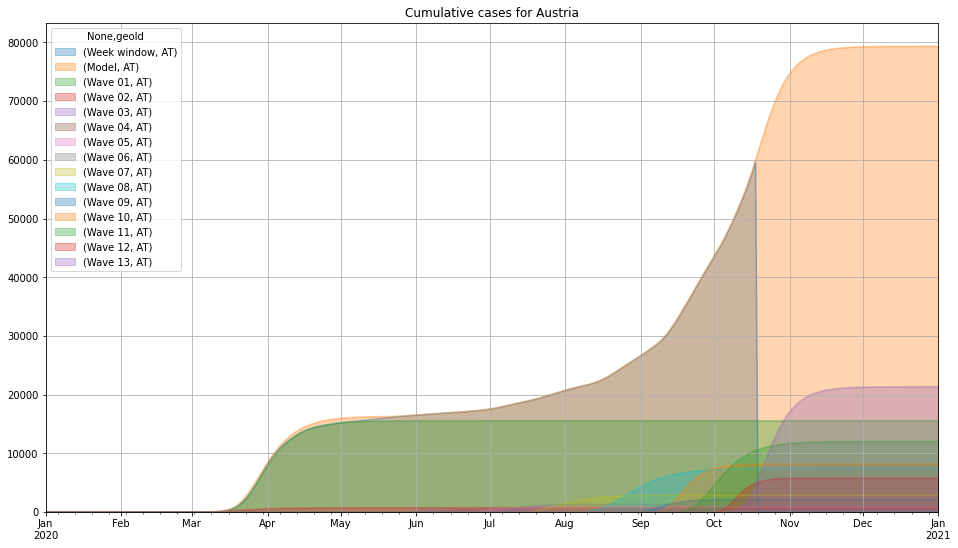

In [104]:
df_dim[plotlist].loc[pr_plotmin:pr_plotmax].plot(
    figsize=(16, 9),
    grid=True,
    kind='area',
    stacked=False,
    alpha=1/3,
    title='Daily new cases for '+dimnam)
df_dim[plotlist].loc[pr_plotmin:pr_plotmax].cumsum().plot(
    figsize=(16, 9),
    grid=True,
    kind='area',
    stacked=False,
    alpha=1/3,
    title='Cumulative cases for '+dimnam)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [105]:
progress = df_dim[pr_measure][pr_dim].sum() / df_dim[pr_pmeasure][pr_dim].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_dim[pr_pmeasure][pr_dim].sum()))

Currently at 81.27% of 79359


The peak date is at the maximum value.

In [106]:
peak = df_dim[df_dim[(pr_pmeasure, pr_dim)] == df_dim[(pr_pmeasure, pr_dim)].max()].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-10-20


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [107]:
print('Peak by last mu at {}'.format(df_dim.loc[df_dim['daynum'] == mu.astype(int)].index[0].date()))

Peak by last mu at 2020-10-21


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [108]:
floor = df_dim[(df_dim[(pr_pmeasure, pr_dim)] < (dimpop / pr_popcases)) &
               (df_dim[(pr_pmeasure, pr_dim)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-12-04


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [109]:
start = df_dim[(df_dim[(pr_pmeasure, pr_dim)] > (dimpop / pr_popcases)) &
               (df_dim[(pr_pmeasure, pr_dim)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-07


We define the maximum delta as the day in the curve with the sharpest rise.

In [110]:
maxrise = (df_dim[(pr_pmeasure, pr_dim)] - df_dim[(pr_pmeasure, pr_dim)].shift()).max()
maxdelta = df_dim[(df_dim[(pr_pmeasure, pr_dim)] - df_dim[(pr_pmeasure, pr_dim)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 63 on 2020-03-21


This should match the maximum gradient of the daily data.

In [111]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_dim[(pr_pmeasure, pr_dim)]).max()))

Maximum gradient is 62


Back to the original curve, showing the number of infected concurrently.

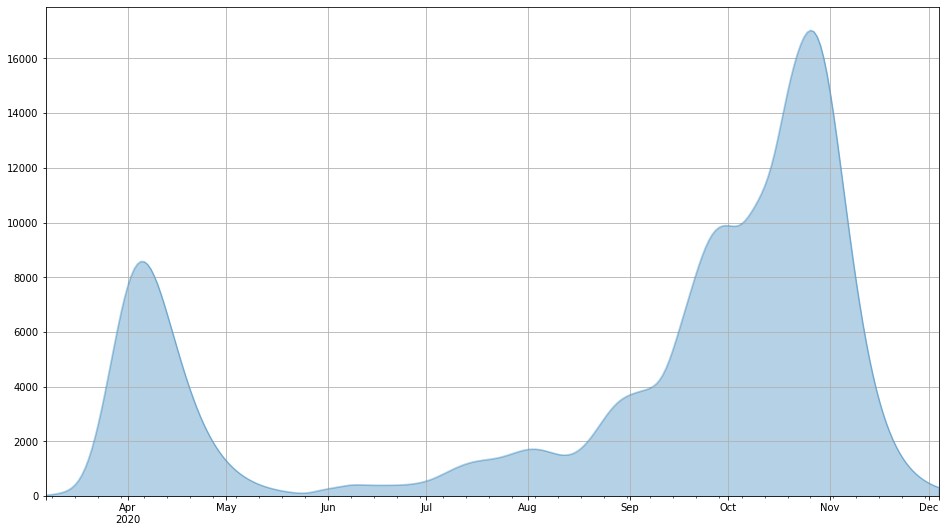

In [112]:
df_dim[pr_pmeasure][pr_dim].rolling(14).sum().loc[start:floor].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

The top of this curve gives the maximum number of people that are infected at the same time.

In [113]:
print('Maximum infected is {:1.0f}'.format(df_dim[pr_pmeasure][pr_dim].rolling(14).sum().max()))

Maximum infected is 17026


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

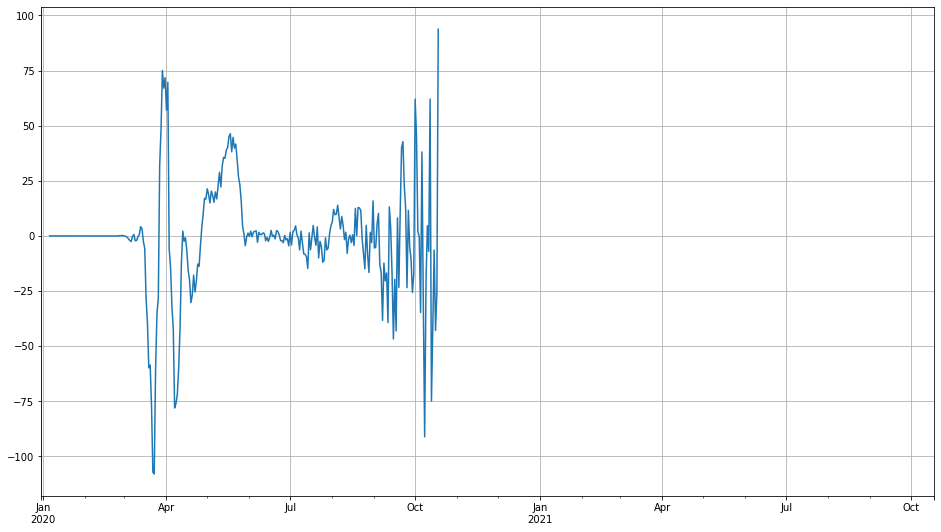

In [114]:
(df_dim[(pr_smeasure, pr_dim)] - df_dim[(pr_pmeasure, pr_dim)]).rolling(1).mean().loc[:].plot(
    figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.